<a href="https://colab.research.google.com/github/ekqlsrla/ESAA/blob/main/HW/0624_CH07_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[파이썬 머신러닝 가이드]**

#**CHAPTER 07 군집화**

---


## 1. K-평균 알고리즘 이해

*K-평균 : 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법*

``` 
1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 둠.
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동.
4. 중심점이 이동했기에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 다시 변경함.
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료
```

1) 장점
* 일반적인 군집화에서 가장 많이 활용되는 알고리즘
* 알고리즘이 쉽고 간결

2) 단점
* 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
* 반복 횟수가 많을 경우 수행시간이 매우 느려짐
* 몇 개의 군집을 선택해야 할지 가이드하기가 어려움


### 1) 사이킷런 KMeans 클래스 소개



```
class sklearn.cluster.KMeans(n_clusters = 8, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.001,
                             precompute_distances = 'auto', verbose = 0, random_state = None, copy_x = True, n_jobs = 1,
                             algorithm = 'auto')
```

* `n_clusters` | 군집 중심점의 개수, 군집화할 개수
* `init` | 초기 군집 중심점의 좌표를 설정할 방식
* `max_iter` | 최대 반복 횟수


### 2) K-평균을 이용한 붓꽃 데이터 세트 군집화

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data = iris.data,columns = ['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=4, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]


In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          27
        3          23
2       0           1
        2          32
        3          17
Name: sepal_length, dtype: int64


In [ ]:
#PCA로 4개의 속성을 2개로 차원 축소한 뒤 개별 데이터 표현

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


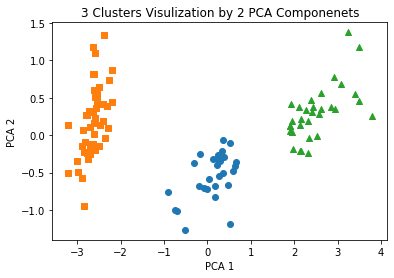

In [ ]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.scatter(x = irisDF.loc[marker0_ind,'pca_x'],y = irisDF.loc[marker0_ind,'pca_y'],marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind,'pca_x'],y = irisDF.loc[marker1_ind,'pca_y'],marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind,'pca_x'],y = irisDF.loc[marker2_ind,'pca_y'],marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visulization by 2 PCA Componenets')
plt.show()

### 3) 군집화 알고리즘 테스트를 위한 데이터 생성

(1) make_blobs : 개별 군집의 중심점과 표준 편차 제어 기능 추가
* `n_samples` 생성할 총 데이터의 개수
* `n_features`  데이터 피처 개수
* `centers` int값으로 설정하면 군집의 개수, ndarray형태는 개별 군집 중심점의 좌표
* `cluster_sd` 생성될 군집 데이터의 표준 편차

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape,y.shape)

#Y target 값의 분포 확인
unique, counts = np.unique(y,return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


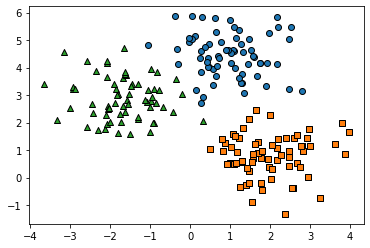

In [ ]:
target_list = np.unique(y)
markers = ['o','s','^','P','D','H','x']
for target in target_list :
  target_cluster = clusterDF[clusterDF['target'] == target]
  plt.scatter(x = target_cluster['ftr1'],y = target_cluster['ftr2'],edgecolor = 'k', marker = markers[target])
plt.show()

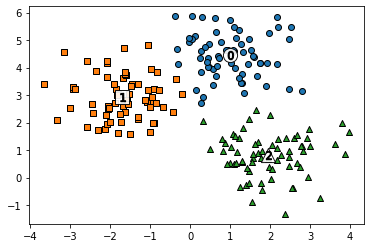

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

for label in unique_labels :
  label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
  center_x_y = centers[label]
  plt.scatter(x = label_cluster['ftr1'],y = label_cluster['ftr2'],edgecolor = 'k',marker = markers[label])

  plt.scatter(x = center_x_y[0], y = center_x_y[1],s = 200, color = 'white',
              alpha = 0.9, edgecolor = 'k', marker = markers[label])
  plt.scatter(x = center_x_y[0], y = center_x_y[1],s = 70, color = 'k', edgecolor = 'k',
              marker = '$%d$' %label)
plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


---
## 2. 군집 평가(Cluster Evaluation)

### 1) 실루엣 분석의 개요

* 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄 -> `다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미`

* 실루엣 계수값 s(i)

$$ s(i) = (b(i) - a(i))/(max(a(i),b(i))$$

  * -1~1사이의 값을 가지며 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것

(1) 실루엣 분석을 위한 메서드
* `sklearn.metrics.silhouette_samples(X,labels,metric = 'euclidean',**kwds)` : 각 데이터 포인트의 실루엣 계수 계산
* `sklearn.metrics.silhouette_score(X,labels, metric = 'euclidean',sample_size = None, **kwds)` :전체 데이터의 셀루엣 계수 값 평균해 반환

(2) 좋은 군집화의 조건

* 전체 실루엣 계수의 평균값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
* 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요


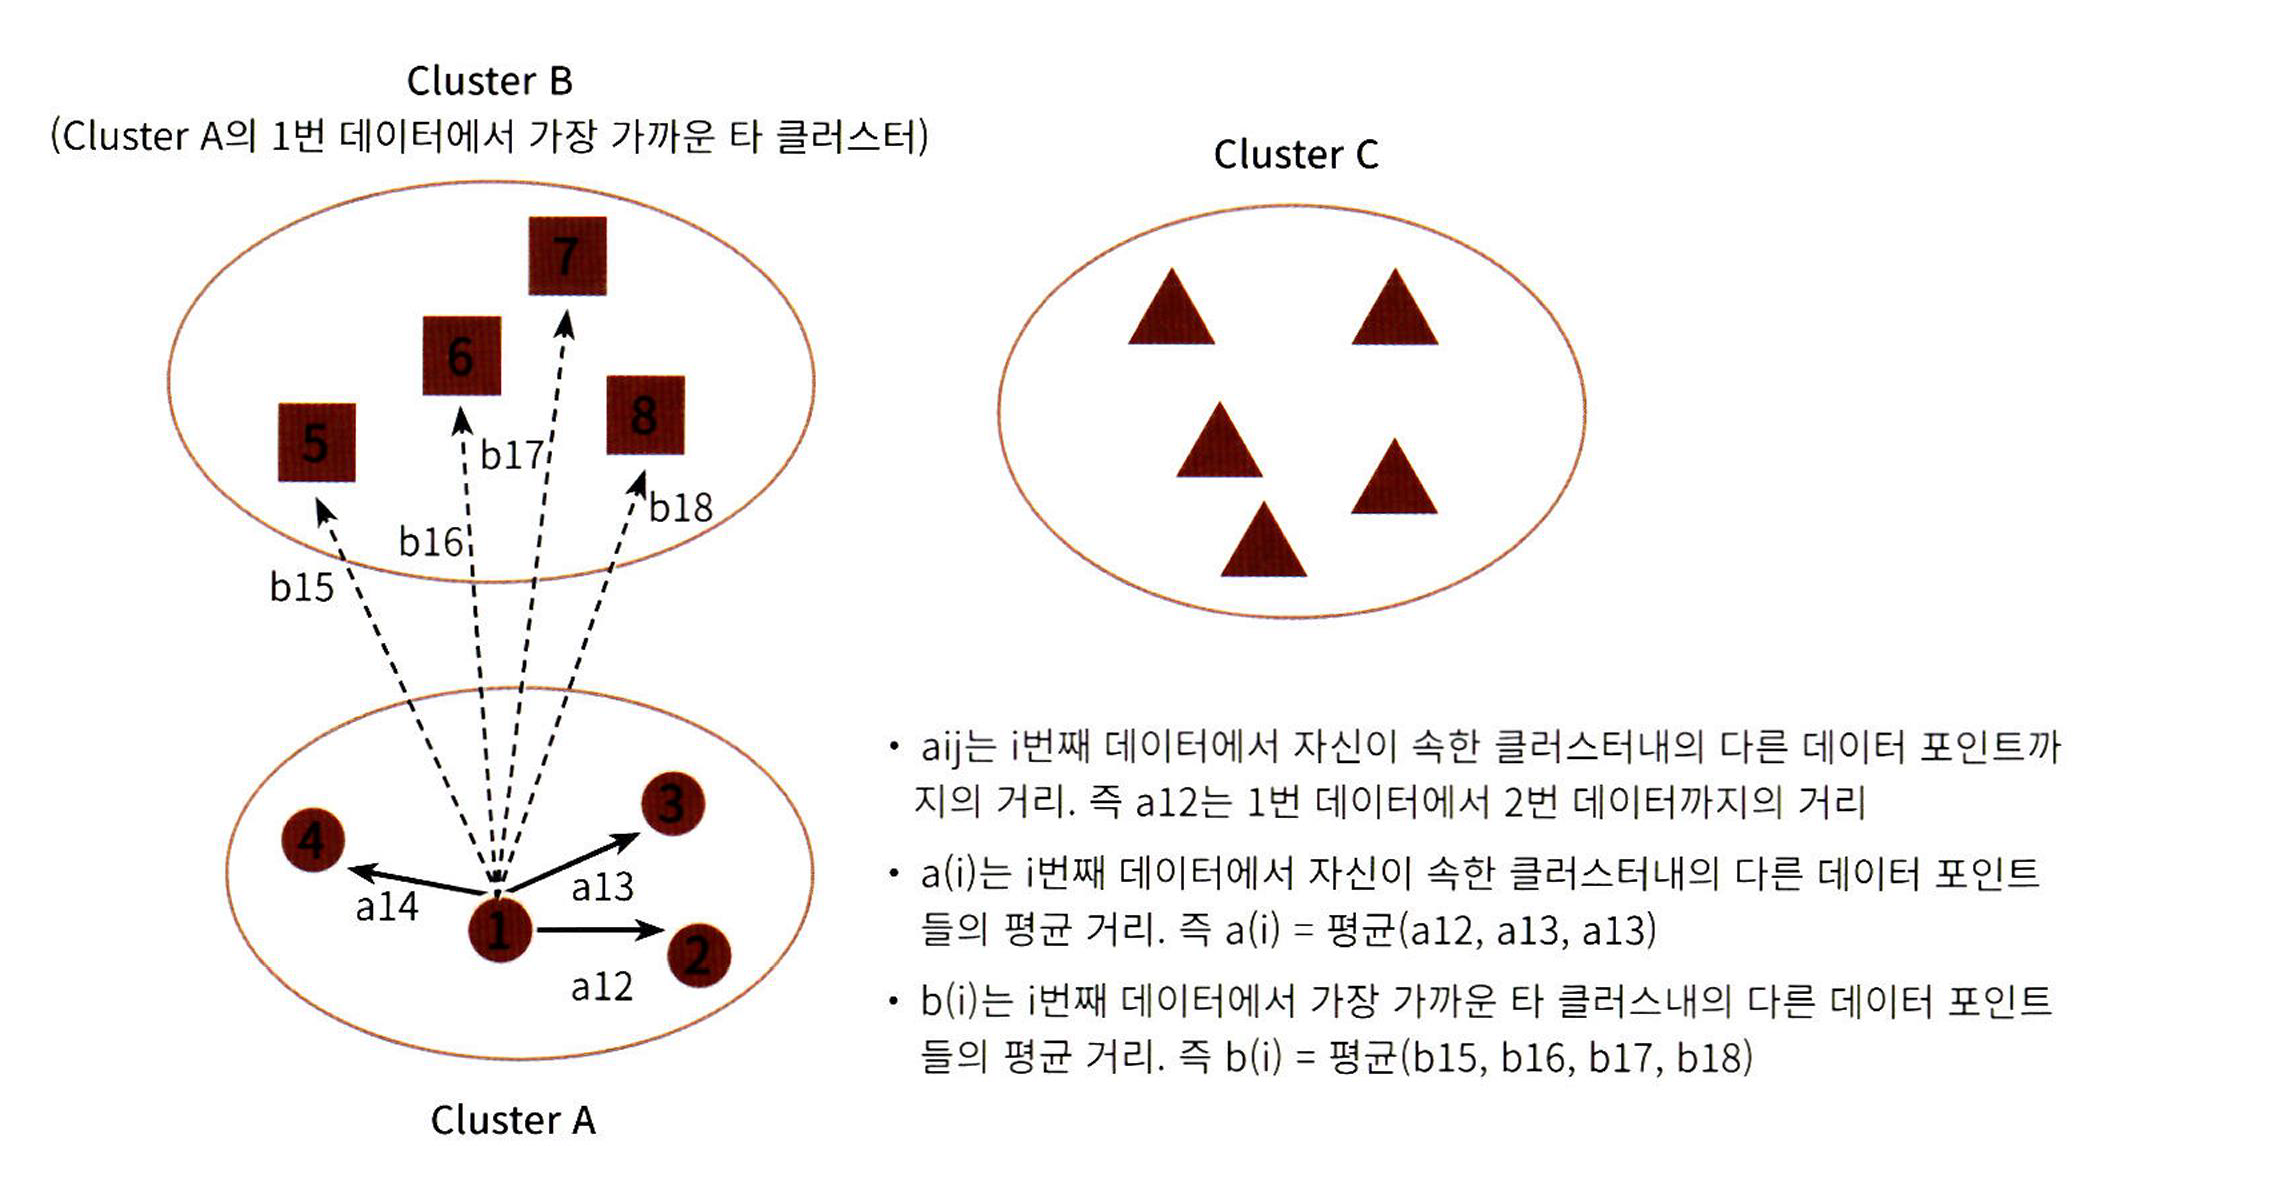

### 2) 붓꽃 데이터 세트를 이용한 군집 평가

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhoutte_samples() return 값의 shape', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhoutte Anlaysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)


silhoutte_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhoutte Anlaysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
#군집별 평균 실루엣 계수 값

irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 3) 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법


In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

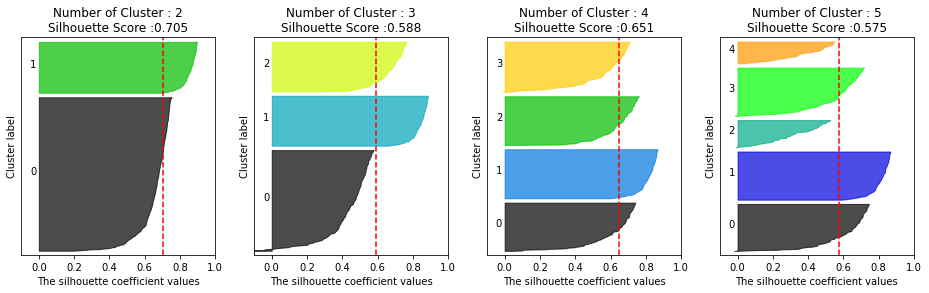

In [ ]:
#make_blobs 를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
#4개의 군집일 때 가장 최적

from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1,
                 center_box = (-10.0,10.0),shuffle = True, random_state = 1)

visualize_silhouette([2,3,4,5],X)

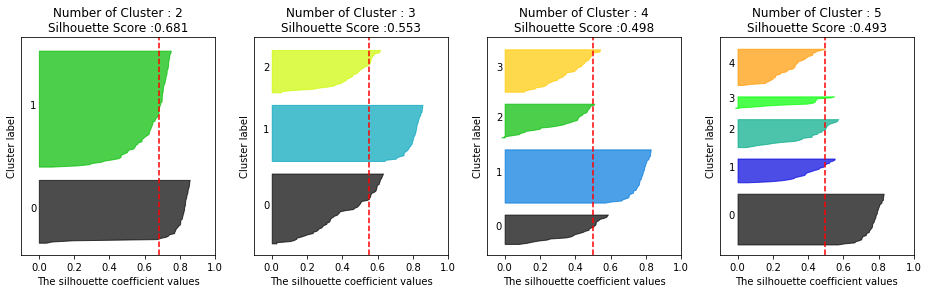

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5],iris.data)

#2개로 하는 것이 가장 좋아보임

---
## 3. 평균이동

### 1) 평균이동(Mean Shift)의 개요

: 평균이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴

* 가장 집중적으로 데이터가 모여있어 학률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 **KDE**를 이용
* 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 **KDE함수** 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식

```
1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE기반의 Mean Shift 알고리즘으로 계산
2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
3. 모든 데이터를 1~2까지 수행하면서 데이터를 이동. 개별 데이터들이 군집 중심점으로 모임
4. 지정된 반복 횟수만큼 전체 데이터에 대해서 KDE기반으로 데이터를 이동시키면서 군집화 수행
5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설정
```

$$KDE = {1 \over nh} \sum\limits_{i=1}^n K({x-x_i \over h})$$

* $K$ : 커널함수
* $x$ : 확률 변숫값
* $x_i$ : 관측값
* $h$ : 대역폭

1. 대역폭 $h$는 KDE 형대틑 부드러운 형태로 평활화하는데 적용
2. 작은 $h$값은 좁고 뾰족한 KDE -> **과적합 하기 쉬움**
3. 매우 큰 $h$값은 과도하게 평활화됨 -> **과소적합 하기 쉬움**
4. 군집의 개수를 지정하지 않고 **대역폭의 크기**에 따라 군집화 수행

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :', np.unique(cluster_labels))

cluster labels 유형 : [0 1 2 3 4 5]


* 일반적으로  **bandwidth** 값을 작게 할수록 군집개수가 많아짐

In [ ]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


* **최적화**된 bandwidth값을 찾는 `estimate_bandwidth()`

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 :', round(bandwidth,3))


bandwidth 값 : 1.816


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('Cluster labels 유형 ;',np.unique(cluster_labels))

Cluster labels 유형 ; [0 1 2]


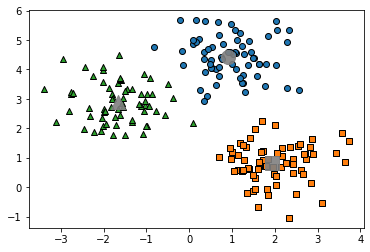

In [ ]:
#구성된 3개 군집 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels :
  label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
  center_x_y = centers[label]

  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'],edgecolor = 'k', marker = markers[label])
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'gray', alpha = 0.9, marker = markers[label])

plt.show()

In [ ]:
#targer값과 군집 label값 비교

print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


---
## 4. GMM(Gaussian Mixture Model)

### 1) GMM(Gaussian Mixture Model) 소개

: 군집화를 적용하고자 하는 데이터가 여러 개의 **가우시안 분포**를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 **군집화** 수행

* 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이를 서로 다른 정규 분포에 기반해 군집화 수행

### 2) GMM을 이용한 붓꽃 데이터 세트 군집화

* `n_components` : gaussian mixture 모델의 총 개수

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','speal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [ ]:
#붓꽃 데이터의 K-평균 군집화

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, random_state = 0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### 3) GMM과 K - 평균의 비교

* KMeans는 **원형**의 범위에서 군집화 수행 -> `데이터가 길쭉한 타원형인 경우에는 군집화 잘 수행하지 못함`

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

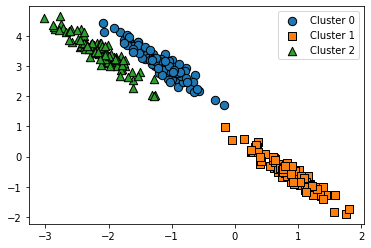

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, n_features = 2, centers = 3, cluster_std = 0.5, random_state = 0)

transformation = [[0.60834549,-0.63667342],[-0.4088718,0.85253229]]
X_aniso = np.dot(X,transformation)
#feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data = X_aniso, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

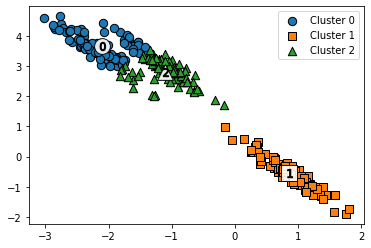

In [ ]:
#3개의 군집 기반 kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state = 0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label 

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter = True)

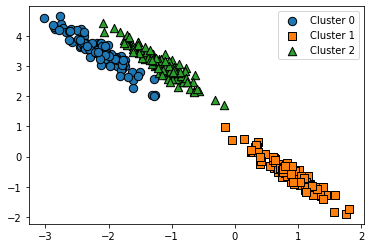

In [ ]:
#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label  

visualize_cluster_plot(gmm,clusterDF, 'gmm_label', iscenter = False)

In [ ]:
#군집화 효율 차이 확인

print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


---
## 5. DBSCAN


###1) DBSCAN 개요

: 특정 공간 내에 **데이터 밀도 차이**를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행

(1) 중요 파라미터

* `입실론 주변 영역(epsilon)` : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
* `최소 데이터 개수(min points)` : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

(2) 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트 다음과 같의 정의
* `핵심포인트(Core Point)` : 주변 영역 내에 **최소 데이터 개수 이상**의 타 데이터를 가지고 있을 경우
* `이웃 포인트(Neighbor Point)` : **주변 영역 내에 위치**한 타 데이터
* `경계 포인트(Border Point)` : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 **핵심 포인트**를 이웃 포인트로 가지고 있는 데이터
* `잡음 포인트(Noise Point)` : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터

### 2) DBSCAM 적용하기 - 붓꽃 데이터 세트

* 군집 레이블이 -1인 것은 노이즈에 속하는 군집

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


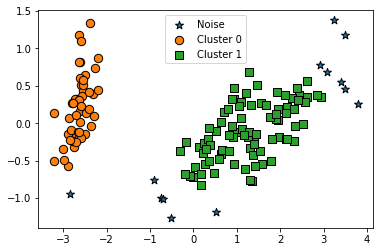

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster',iscenter = False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


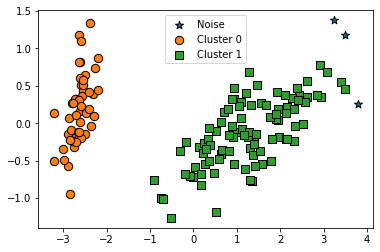

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster',iscenter = False)

In [17]:
dbscan = DBSCAN(eps = 0.6, min_samples = 16, metric = 'euclidean')

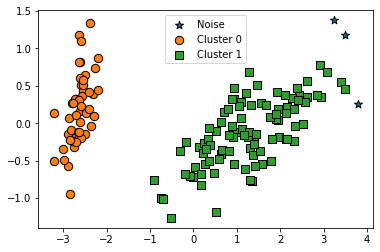

In [18]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster',iscenter = False)

### 3) DBSCAN 적용하기 - make_circles() 데이터 세트

* `noise` : 노이즈 데이터 세트의 비율
* `factor` : 외부 원과 내부 원의 scale 비율

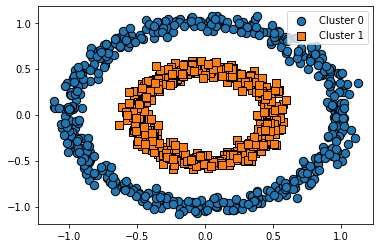

In [23]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None,clusterDF,'target',iscenter = False)

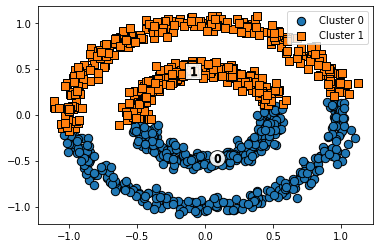

In [25]:
#KMeans로 make_circles() 데이터 세트를 군집화 수행

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans,clusterDF, 'kmeans_cluster',iscenter = True)

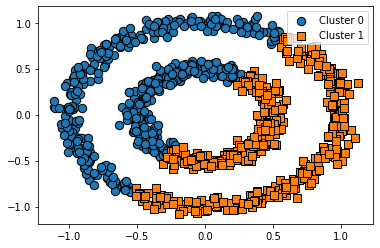

In [28]:
#GMM

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm,clusterDF, 'gmm_cluster',iscenter = False)

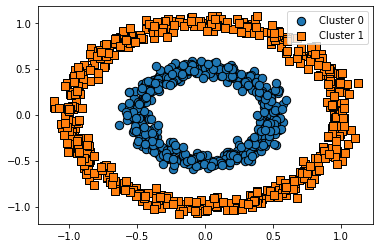

In [29]:
#DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter = False)